# Temperature Exploration

April 29, 2023  
Gully & Ryan H.

Using Fleck to create cartoons showing how starspots effect the flux of stars.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from fleck import Star, generate_spots
import lightkurve as lk

## Example from website:

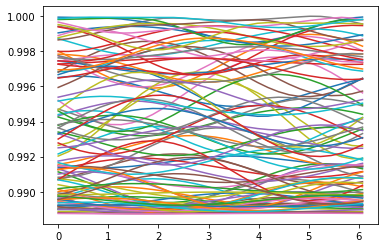

In [2]:
spot_contrast = 0.7
u_ld = [0.5079, 0.2239]

n_phases = 30
n_inclinations = 100
n_spots = 3

spot_radius = 0.1   # Rspot/Rstar
min_latitude = 70   # deg
max_latitude = 90   # deg

lons, lats, radii, inc_stellar = generate_spots(min_latitude, max_latitude,
                                                spot_radius, n_spots,
                                                n_inclinations=n_inclinations)

star = Star(spot_contrast=spot_contrast, n_phases=n_phases, u_ld=u_ld)

lcs = star.light_curve(lons, lats, radii, inc_stellar)

plt.plot(star.phases, lcs)
plt.show()

## Testing:

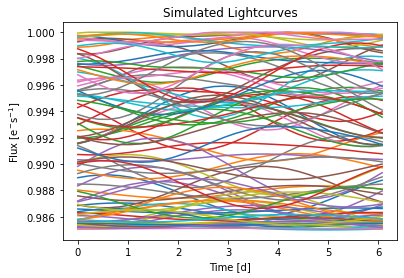

In [3]:
spot_contrast = 0.6     # contrast ratio
u_ld = [0.5079, 0.2239] # limb darkening

n_phases = 30        # number of generated phases
n_inclinations = 100 # number of inclinations
n_spots = 3          # number of spots

spot_radius = 0.1   # Rspot/Rstar
min_latitude = 70   # deg
max_latitude = 90   # deg

lons, lats, radii, inc_stellar = generate_spots(min_latitude, max_latitude,
                                                spot_radius, n_spots,
                                                n_inclinations=n_inclinations)

star = Star(spot_contrast=spot_contrast, n_phases=n_phases, u_ld=u_ld)

lcs = star.light_curve(lons, lats, radii, inc_stellar)

plt.plot(star.phases, lcs)
plt.title('Simulated Lightcurves')
plt.ylabel("Flux [$\mathrm{e}^{-} \mathrm{s}^{-1}$]")
plt.xlabel("Time [d]")
plt.show()

In [4]:
df = pd.DataFrame(lcs, columns = [_ for _ in range(len(lcs[0]))])

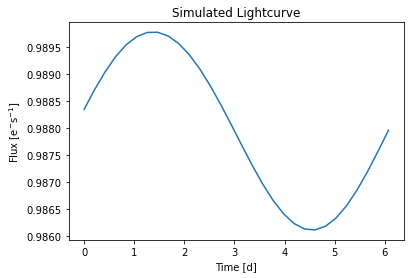

In [5]:
# try plotting just one curve
plt.plot(star.phases, df[4])
plt.title('Simulated Lightcurve')
plt.ylabel("Flux [$\mathrm{e}^{-} \mathrm{s}^{-1}$]")
plt.xlabel("Time [d]")
plt.show()